In [2]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from pycaret.classification import * 

In [3]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
submission = pd.read_csv('./data/sample_submission.csv')

In [4]:
# report = create_report(train)
# report.save('dataprep_reoprt')

1. train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부

In [5]:
train.columns = train.columns.str.replace(' ', '_')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 23 columns):
Gender                               3000 non-null object
Customer_Type                        3000 non-null object
Age                                  3000 non-null int64
Type_of_Travel                       3000 non-null object
Class                                3000 non-null object
Flight_Distance                      3000 non-null int64
Seat_comfort                         3000 non-null int64
Departure/Arrival_time_convenient    3000 non-null int64
Food_and_drink                       3000 non-null int64
Gate_location                        3000 non-null int64
Inflight_wifi_service                3000 non-null int64
Inflight_entertainment               3000 non-null int64
Online_support                       3000 non-null int64
Ease_of_Online_booking               3000 non-null int64
On-board_service                     3000 non-null int64
Leg_room_service                  

In [6]:
test.columns = test.columns.str.replace(' ', '_')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 22 columns):
Gender                               2000 non-null object
Customer_Type                        2000 non-null object
Age                                  2000 non-null int64
Type_of_Travel                       2000 non-null object
Class                                2000 non-null object
Flight_Distance                      2000 non-null int64
Seat_comfort                         2000 non-null int64
Departure/Arrival_time_convenient    2000 non-null int64
Food_and_drink                       2000 non-null int64
Gate_location                        2000 non-null int64
Inflight_wifi_service                2000 non-null int64
Inflight_entertainment               2000 non-null int64
Online_support                       2000 non-null int64
Ease_of_Online_booking               2000 non-null int64
On-board_service                     2000 non-null int64
Leg_room_service                  

* 훈련 데이터가 적고 결측치가 존재하지 않음

다른 항목들은 1에서 5의 항목까지 있는 반면 0에서 5까지의 범위가 있는 항목들이 종종 있음--> 0을 결측치로 추정 
- (전날 실수로 test data는 적용을 안함! ㅠ)

In [7]:
train.loc[train['Seat_comfort']==0, 'Seat_comfort'] = np.nan
train.loc[train['Departure/Arrival_time_convenient']==0, 'Departure/Arrival_time_convenient'] = np.nan
train.loc[train['Inflight_entertainment']==0, 'Inflight_entertainment'] = np.nan
train.loc[train['Ease_of_Online_booking']==0, 'Ease_of_Online_booking'] = np.nan
train.loc[train['Leg_room_service']==0, 'Leg_room_service'] = np.nan

test.loc[test['Seat_comfort']==0, 'Seat_comfort'] = np.nan
test.loc[test['Departure/Arrival_time_convenient']==0, 'Departure/Arrival_time_convenient'] = np.nan
test.loc[test['Inflight_entertainment']==0, 'Inflight_entertainment'] = np.nan
test.loc[test['Ease_of_Online_booking']==0, 'Ease_of_Online_booking'] = np.nan
test.loc[test['Leg_room_service']==0, 'Leg_room_service'] = np.nan

In [8]:
print(train.isna().sum())
print(test.isna().sum())

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Seat_comfort                         106
Departure/Arrival_time_convenient    154
Food_and_drink                         0
Gate_location                          0
Inflight_wifi_service                  0
Inflight_entertainment                73
Online_support                         0
Ease_of_Online_booking                 1
On-board_service                       0
Leg_room_service                      11
Baggage_handling                       0
Checkin_service                        0
Cleanliness                            0
Online_boarding                        0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes               0
target                                 0
dtype: int64
Gender                                0
Cust

lightgbm으로 imputation

In [9]:
ignore_features =[]
cat_features = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'Seat_comfort', 
                'Departure/Arrival_time_convenient', 'Gate_location', 'Inflight_entertainment', 
                'Online_support','Ease_of_Online_booking', 'On-board_service', 
                'Leg_room_service','Checkin_service', 'Cleanliness']
num_features = ['Age', 'Flight_Distance', 'Arrival_Delay_in_Minutes']
#0.9089

In [8]:
clf = setup(data=train, 
            target='target', 
            ignore_features=ignore_features,           
            categorical_features=cat_features, 
            numeric_features=num_features,
            remove_outliers=True,
            outliers_threshold=0.1,
            normalize=True,                            
#             handle_unknown_categorical=True,
            imputation_type='iterative',              
            iterative_imputation_iters=10,            
            categorical_iterative_imputer='lightgbm',
#             polynomial_features=True,
            session_id=42, 
            silent=True,
#             feature_selection=True,
#             fix_imbalance=True,
            remove_multicollinearity=True,
#             ignore_low_variance=True,
#             profile=True
            ) 

,Description,Value
0,session_id,42
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 23)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_models = compare_models(sort='Accuracy', n_select=3, fold=5, verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9222,0.9789,0.9335,0.9328,0.933,0.8402,0.8405,0.564
xgboost,Extreme Gradient Boosting,0.9158,0.9783,0.9271,0.928,0.9275,0.8272,0.8274,0.162
lightgbm,Light Gradient Boosting Machine,0.9116,0.9765,0.9244,0.9237,0.9239,0.8184,0.8187,0.06
et,Extra Trees Classifier,0.9052,0.971,0.9226,0.9152,0.9187,0.8051,0.8054,0.202
gbc,Gradient Boosting Classifier,0.9047,0.9716,0.918,0.9181,0.9179,0.8044,0.8047,0.1
rf,Random Forest Classifier,0.8999,0.9691,0.918,0.9108,0.9142,0.7942,0.7947,0.206
lr,Logistic Regression,0.8883,0.9587,0.9044,0.9036,0.9038,0.7706,0.771,0.668
ada,Ada Boost Classifier,0.8872,0.955,0.8953,0.9094,0.9022,0.7691,0.7694,0.064
lda,Linear Discriminant Analysis,0.8814,0.9577,0.8989,0.8972,0.8979,0.7565,0.7568,0.014
ridge,Ridge Classifier,0.8809,0,0.898,0.8971,0.8974,0.7554,0.7558,0.006


In [10]:
tuned_cat = tune_model(best_models[0], fold=5, optimize='Accuracy',choose_better=True)#, choose_better=True

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9153,0.9733,0.9452,0.9119,0.9283,0.8251,0.8259
1,0.8968,0.9622,0.9045,0.9171,0.9108,0.7885,0.7886
2,0.9259,0.9784,0.9545,0.9211,0.9375,0.8467,0.8475
3,0.9127,0.9669,0.9136,0.9349,0.9241,0.8214,0.8217
4,0.9098,0.9676,0.9224,0.9224,0.9224,0.8148,0.8148
Mean,0.9121,0.9697,0.9281,0.9215,0.9246,0.8193,0.8197
SD,0.0094,0.0056,0.0189,0.0076,0.0087,0.0187,0.019


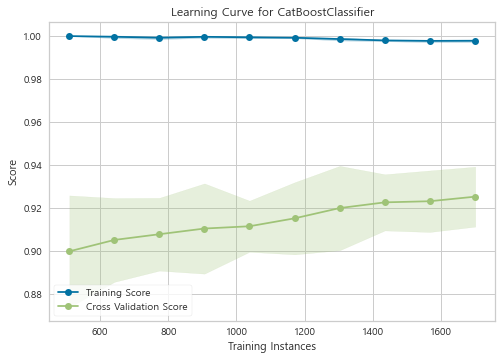

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [14]:
plot_model(tuned_cat, plot='learning')

In [11]:
boost_cat15 = ensemble_model(tuned_cat, method="Boosting", fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9286,0.9824,0.9452,0.9324,0.9388,0.8531,0.8532
1,0.9206,0.9809,0.9452,0.92,0.9324,0.8363,0.8368
2,0.9603,0.9933,0.9589,0.9722,0.9655,0.9188,0.9189
3,0.8968,0.9723,0.9178,0.9054,0.9116,0.7878,0.7879
4,0.9524,0.9886,0.9315,0.9855,0.9577,0.9033,0.9052
5,0.8968,0.969,0.9178,0.9054,0.9116,0.7878,0.7879
6,0.9206,0.9822,0.9589,0.9091,0.9333,0.8355,0.8373
7,0.9286,0.9848,0.9589,0.9211,0.9396,0.8523,0.8533
8,0.9683,0.9959,0.9863,0.96,0.973,0.9345,0.935
9,0.9127,0.9814,0.9178,0.9306,0.9241,0.8213,0.8215


In [14]:
prediction = predict_model(data=test, estimator=boost_cat15)
prediction

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Label,Score
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1.0,1.0,1,1,...,5,5.0,5,3,5,3,51,58.0,1,0.9783
2,Female,disloyal Customer,27,Business travel,Business,1846,1.0,1.0,1,4,...,3,4.0,5,4,4,1,0,0.0,0,0.9651
3,Female,Loyal Customer,52,Business travel,Business,1622,4.0,4.0,4,4,...,5,5.0,5,4,5,3,0,0.0,1,0.9892
4,Male,Loyal Customer,54,Business travel,Business,3534,4.0,4.0,4,4,...,2,2.0,2,5,2,1,0,0.0,1,0.9368
5,Female,Loyal Customer,41,Business travel,Eco,1471,4.0,3.0,3,3,...,3,1.0,2,5,4,4,0,0.0,1,0.9321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Female,Loyal Customer,62,Business travel,Eco Plus,54,3.0,1.0,1,1,...,3,3.0,3,3,3,1,0,0.0,0,0.8932
1997,Female,Loyal Customer,33,Business travel,Business,1937,4.0,4.0,4,4,...,5,5.0,5,1,5,3,95,99.0,1,0.9895
1998,Male,Loyal Customer,29,Business travel,Eco,2398,3.0,5.0,4,4,...,1,2.0,3,4,2,3,0,3.0,0,0.9592


In [16]:
submission.to_csv('catboost_boost15_lightgbm_imputation.csv', index=False)

LB 0.92